# Палеоклиматологические исследования ледяных кернов

### Задание 1

Сначала мы найдем данные по керну EPICA Dome C. Для этого загрузим библиотеки:

In [34]:
import pandas as pd # Import Pandas library to work with files
import numpy as np # Import Numpy library to process big data
import matplotlib.pyplot as plt # Import Matpotlib to build graphs
import seaborn as sns # Import Seaborn as an addition for Matpotlib

In [35]:
# Read the data from the file, using space as the column separator and ignoring lines starting with '#'
df["gas_ageBP"] = df["gas_ageBP\tCO2"].str.split("\t").str[0].astype(np.int64)
# Do the same with another file
df["CO2"] = df["gas_ageBP\tCO2"].str.split("\t").str[1].astype(float)
# Separate data into columns
df.drop(columns=["gas_ageBP\tCO2"], inplace = True)
df

,gas_ageBP,CO2
0,137,280.4
1,268,274.9
2,279,277.9
3,395,279.1
4,404,281.9
...,...,...
1091,794608,199.4
1092,795202,195.2
1093,796467,189.3
1094,797099,188.4


Text(0.5, 1.0, 'Dependence of CO2 concentration on age')

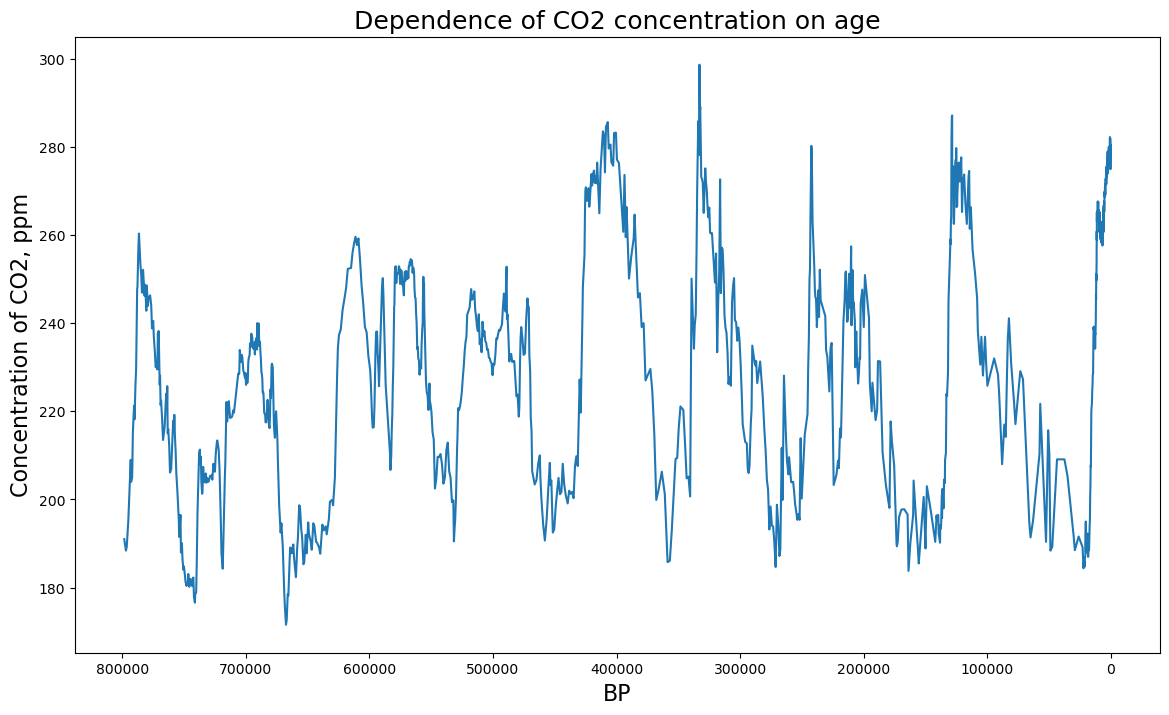

In [40]:
plt.figure(figsize=(14,8)) # Set the graph's size
plt.plot(df["gas_ageBP"], df["CO2"]) # Set the graph's plot

vals = plt.gca().get_xticks() # Get the x-axis tick values from the plot
plt.gca().invert_xaxis() # Invert the x-axis

plt.xlabel("BP", fontsize=16) # Set the fontsize of x-axis
plt.ylabel("Concentration of CO2, ppm", fontsize=16) # Set the fontsize of y-axis
plt.title("Dependence of CO2 concentration on age", fontsize=18) # Set the fontsize of the title

### Задание 2

In [41]:
# Read the data from the file
df = pd.read_csv("gripd18o.txt", sep="\t")
df

,Depth (m),del18O (per mil),Age (yrs BP)
0,0.00,-35.04,-39.000
1,0.55,-33.81,-38.065
2,1.10,-36.18,-37.187
3,1.65,-34.92,-36.118
4,2.20,-35.62,-35.145
...,...,...,...
5420,2981.00,-37.37,244130.000
5421,2981.55,-37.84,245211.000
5422,2982.10,-38.20,246377.000
5423,2982.65,-37.50,247618.000


In [42]:
# Count temperature in columns
df["Temperature (°C)"] = (13.7 + df["del18O (per mil)"]) / 0.67
df

,Depth (m),del18O (per mil),Age (yrs BP),Temperature (°C)
0,0.00,-35.04,-39.000,-31.850746
1,0.55,-33.81,-38.065,-30.014925
2,1.10,-36.18,-37.187,-33.552239
3,1.65,-34.92,-36.118,-31.671642
4,2.20,-35.62,-35.145,-32.716418
...,...,...,...,...
5420,2981.00,-37.37,244130.000,-35.328358
5421,2981.55,-37.84,245211.000,-36.029851
5422,2982.10,-38.20,246377.000,-36.567164
5423,2982.65,-37.50,247618.000,-35.522388


In [43]:
# Count dates in columns
df["Age (yrs BP)"] += 2024 - 1950

In [44]:
# Creat a mask consisting of a needed period
period_df = df[(df["Age (yrs BP)"] > 10000) & (df["Age (yrs BP)"] < 50000)]

C:\Users\Lionix\AppData\Local\Temp\ipykernel_2184\683828737.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(x) for x in vals/1e3])


Text(0.5, 1.0, 'Dependence of del18O concentration on age')

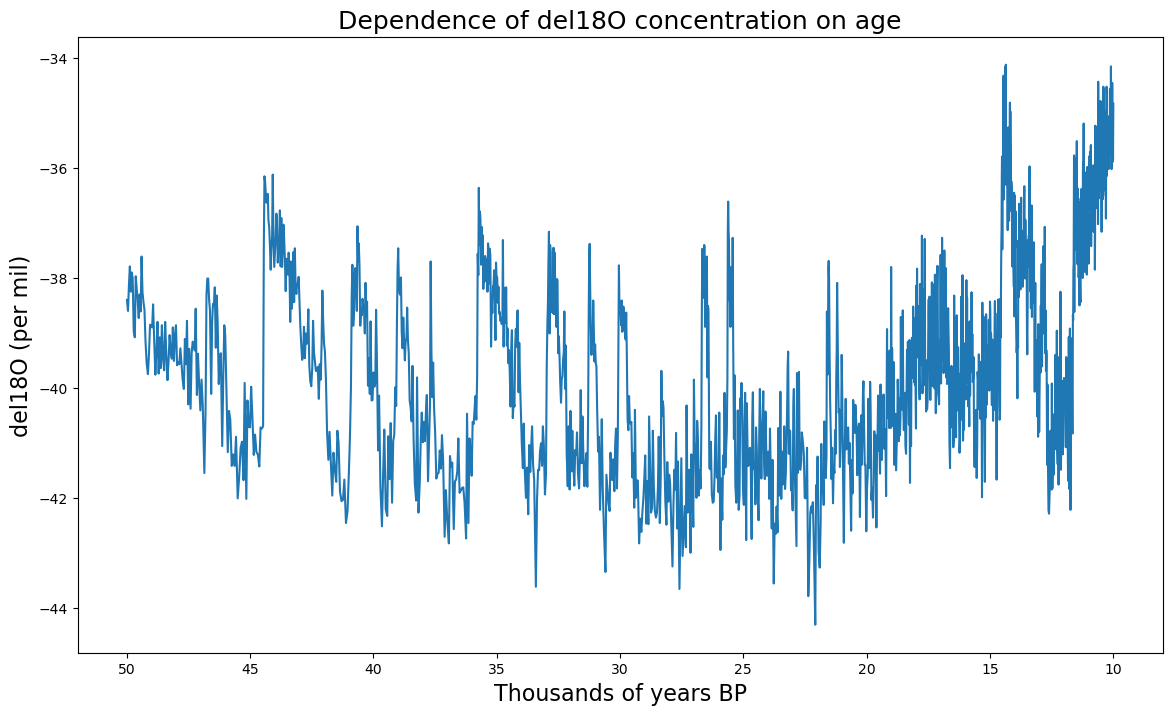

In [69]:
plt.figure(figsize=(14,8)) # Set the graph's size
plt.plot(period_df["Age (yrs BP)"], period_df["del18O (per mil)"]) # Set the graph's plot

vals = plt.gca().get_xticks() # Get the x-axis tick values from the plot
plt.gca().set_xticklabels([int(x) for x in vals/1e3]) # Set x-axis tick labels to be the values from vals
plt.gca().invert_xaxis() # Invert the x-axis

plt.xlabel("Thousands of years BP", fontsize=16) # Set the fontsize of x-axis
plt.ylabel("del18O (per mil)", fontsize=16) # Set the fontsize of y-axis
plt.title("Dependence of del18O concentration on age", fontsize=18) # Set the fontsize of the title

C:\Users\Lionix\AppData\Local\Temp\ipykernel_2184\1470675471.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(x) for x in vals/1e4])


Text(0.5, 1.0, 'Dependence of temperature on age')

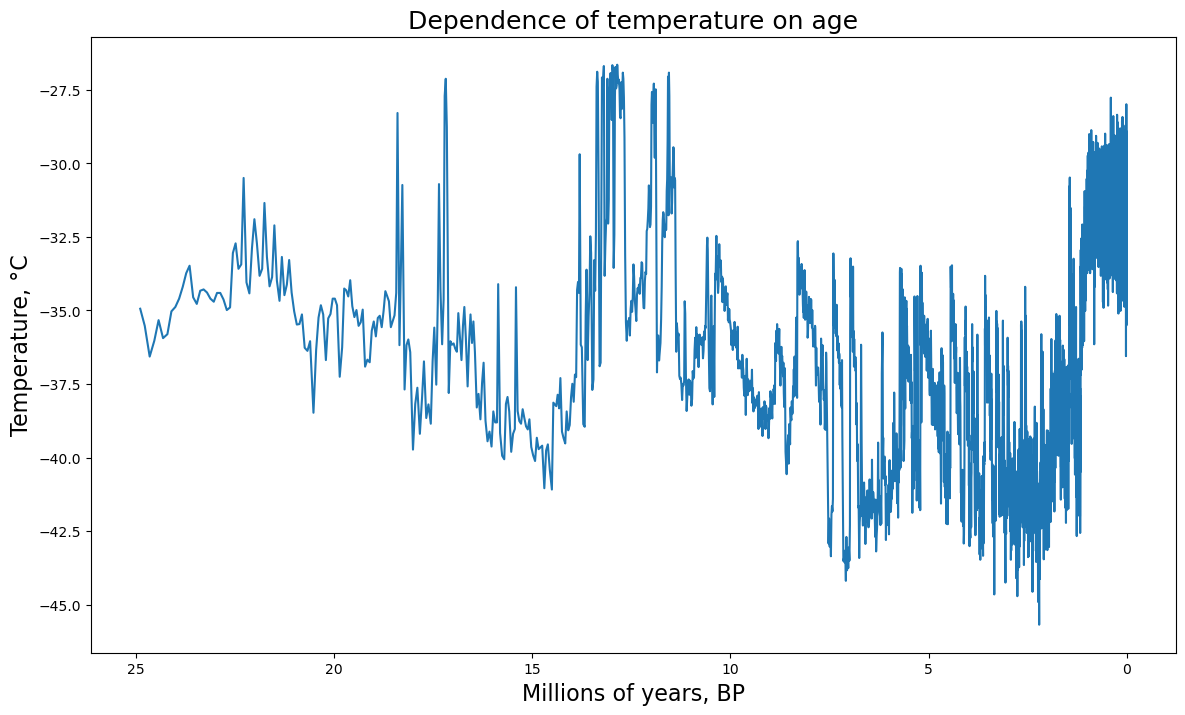

In [70]:
plt.figure(figsize=(14,8)) # Set the graph's size
plt.plot(df["Age (yrs BP)"], df["Temperature (°C)"]) # Set the graph's plot

vals = plt.gca().get_xticks() # Get the x-axis tick values from the plot
plt.gca().set_xticklabels([int(x) for x in vals/1e4]) # Set x-axis tick labels to be the values from vals
plt.gca().invert_xaxis() # Invert the x-axis

plt.xlabel("Millions of years, BP", fontsize=16) # Set the fontsize of x-axis
plt.ylabel("Temperature, °C", fontsize=16) # Set the fontsize of y-axis
plt.title("Dependence of temperature on age", fontsize=18) # Set the fontsize of the title

In [50]:
# Creat a mask consisting of a needed period
df_Dansgaard_Oeschger = df[(df["Age (yrs BP)"] > 41000) & (df["Age (yrs BP)"] < 45000)]

C:\Users\Lionix\AppData\Local\Temp\ipykernel_2184\2629100786.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([x for x in vals/1e3])


Text(0.5, 1.0, 'Dependence of temperature on age')

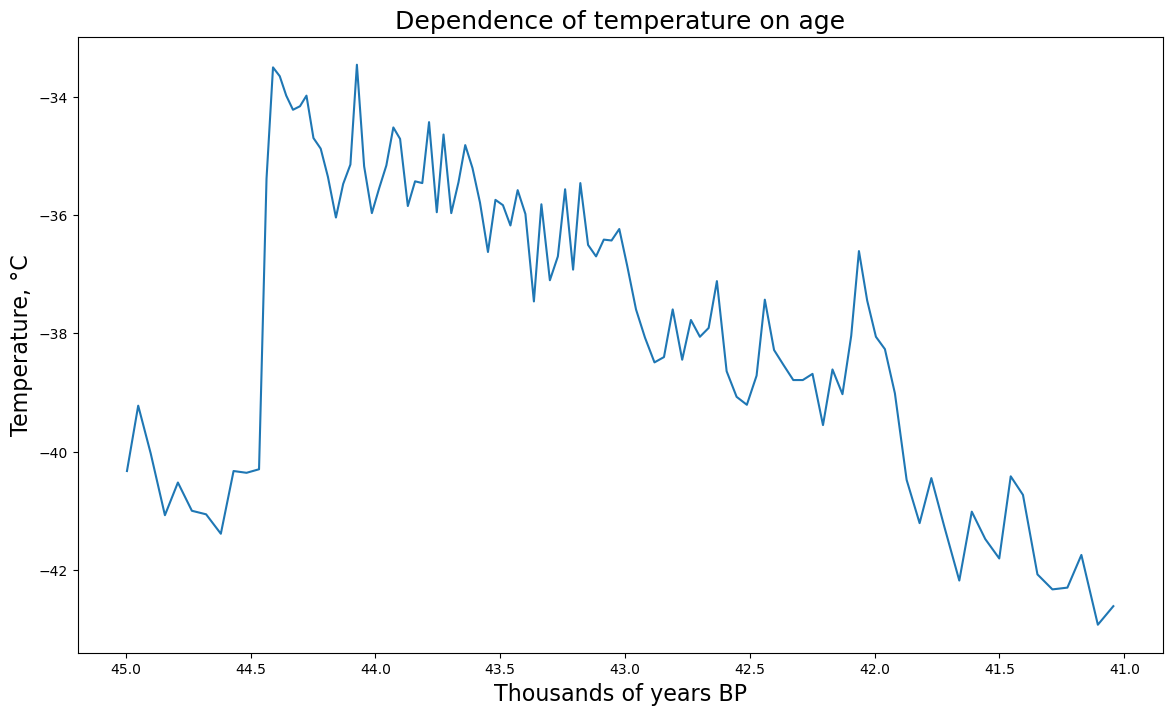

In [52]:
plt.figure(figsize=(14,8)) # Set the graph's size
plt.plot(df_Dansgaard_Oeschger["Age (yrs BP)"], df_Dansgaard_Oeschger["Temperature (°C)"]) # Set the graph's plot

vals = plt.gca().get_xticks() # Get the x-axis tick values from the plot
plt.gca().set_xticklabels([x for x in vals/1e3]) # Set x-axis tick labels to be the values from vals
plt.gca().invert_xaxis() # Invert the x-axis

plt.xlabel("Thousands of years BP", fontsize=16) # Set the fontsize of x-axis
plt.ylabel("Temperature, °C", fontsize=16) # Set the fontsize of y-axis
plt.title("Dependence of temperature on age", fontsize=18) # Set the fontsize of the title

In [53]:
# Creat a mask consisting of a needed period
df_zoomed = df[(df["Age (yrs BP)"] > 44350) & (df["Age (yrs BP)"] < 44600)]

C:\Users\Lionix\AppData\Local\Temp\ipykernel_2184\4128636469.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([x for x in vals/1e3])


Text(0.5, 1.0, 'Dependence of temperature on age')

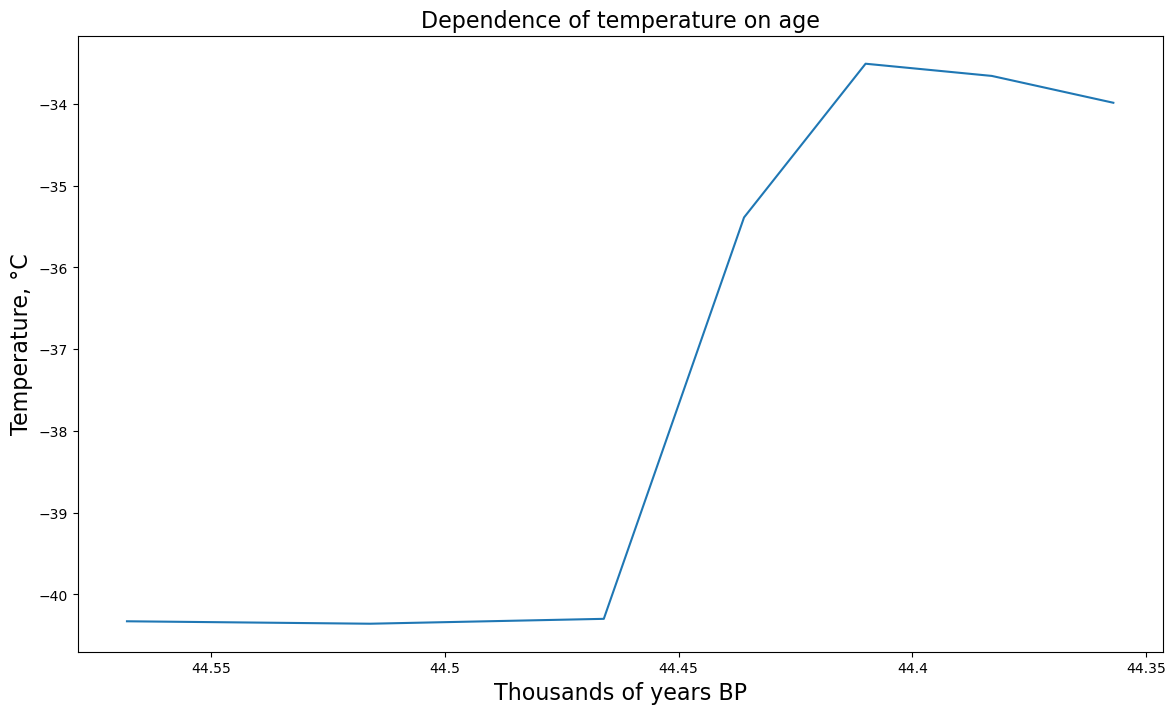

In [54]:
plt.figure(figsize=(14,8)) # Set the graph's size
plt.plot(df_zoomed["Age (yrs BP)"], df_zoomed["Temperature (°C)"]) # Set the graph's plot

vals = plt.gca().get_xticks() # Get the x-axis tick values from the plot
plt.gca().set_xticklabels([x for x in vals/1e3]) # Set x-axis tick labels to be the values from vals
plt.gca().invert_xaxis() # Invert the x-axis

plt.xlabel("Thousands of years BP", fontsize=16) # Set the fontsize of x-axis
plt.ylabel("Temperature, °C", fontsize=16) # Set the fontsize of y-axis
plt.title("Dependence of temperature on age", fontsize=16) # Set the fontsize of the title

* Процесс осцилляуции Дансгора-Эшгера начался применрно 44470 лет назад и закончился примерно через 60 лет, температура подднялась на 6.5 градусов Цельсия;
* Чтобы снова похолодало до уровня ледникового периода, потребовалось примерно 3500 лет.

### Задание 3

In [55]:
# Read the data from the file
df_deuttemp = pd.read_csv("edc3deuttemp2007.txt", encoding="windows-1252", sep="\t")
df_deuttemp

,Bag,ztop,Age,Deuterium,Temperature
0,1,0.00,-50.00000,NaN,NaN
1,2,0.55,-43.54769,NaN,NaN
2,3,1.10,-37.41829,NaN,NaN
3,4,1.65,-31.61153,NaN,NaN
4,5,2.20,-24.51395,NaN,NaN
...,...,...,...,...,...
5795,5796,3187.25,797408.00000,-440.20,-8.73
5796,5797,3187.80,798443.00000,-439.00,-8.54
5797,5798,3188.35,799501.00000,-441.10,-8.88
5798,5799,3188.90,800589.00000,-441.42,-8.92


Единицы измерения параметров:
* ztop - m
* Age - BP, отсчитывается от 1950
* Deuterium - per mille with respect to SMOW
* Temperature - °C

Text(0.5, 1.0, 'Dependence of deuterium concentration on temperature')

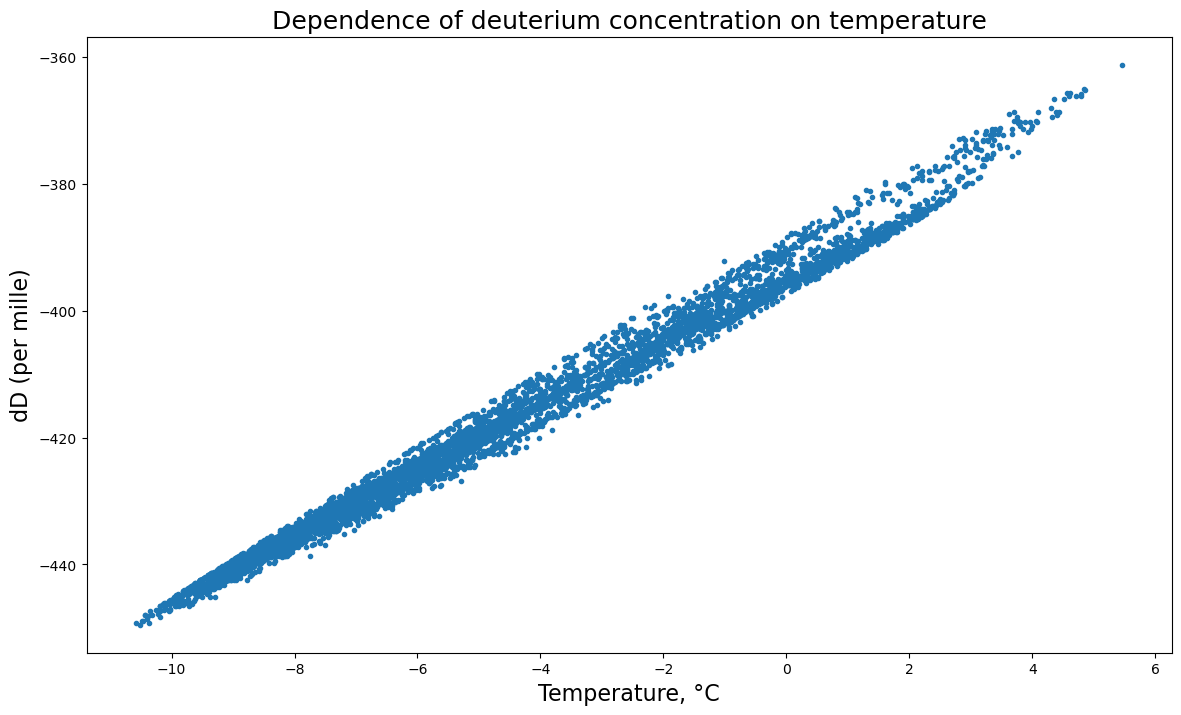

In [57]:
plt.figure(figsize=(14,8)) # Set the graph's size
plt.plot(df_deuttemp["Temperature"], df_deuttemp["Deuterium"], '.') # Set the graph's plot

plt.xlabel("Temperature, °C", fontsize=16) # Set the fontsize of x-axis
plt.ylabel("dD (per mille)", fontsize=16) # Set the fontsize of y-axis
plt.title("Dependence of deuterium concentration on temperature", fontsize=18) # Set the fontsize of the title

Разрешение данных - high resolution

Видна очевидная линейная зависимость между параметрами

C:\Users\Lionix\AppData\Local\Temp\ipykernel_2184\2581917650.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels([int(x) for x in vals/1e3])


Text(0.5, 1.0, 'Dependence of temperature on age')

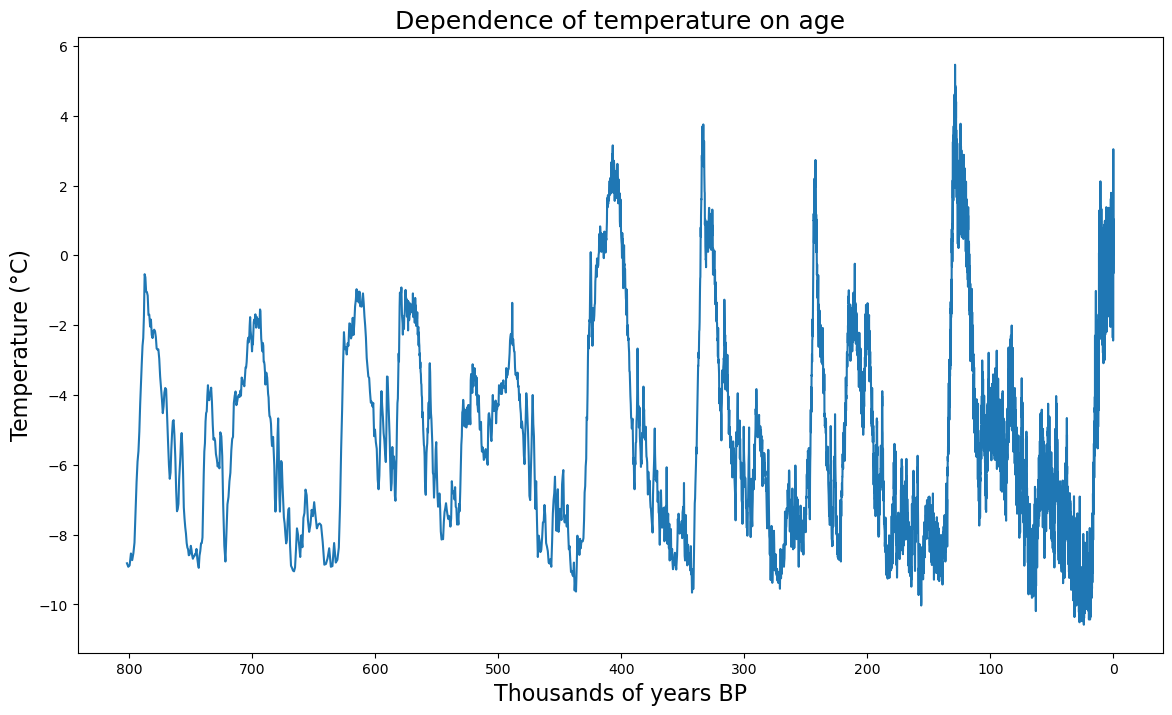

In [58]:
plt.figure(figsize=(14,8)) # Set the graph's size
plt.plot(df_deuttemp["Age"], df_deuttemp["Temperature"]) # Set the graph's plot

vals = plt.gca().get_xticks() # Get the x-axis tick values from the plot
plt.gca().set_xticklabels([int(x) for x in vals/1e3]) # Set x-axis tick labels to be the values from vals
plt.gca().invert_xaxis() # Invert the x-axis

plt.xlabel("Thousands of years BP", fontsize=16) # Set the fontsize of x-axis
plt.ylabel("Temperature (°C)", fontsize=16) # Set the fontsize of y-axis
plt.title("Dependence of temperature on age", fontsize=18) # Set the fontsize of the title

Межледниковый период характеризуется наличием положительной температуры, поэтому на графике можно отметить 5 переходов от ледниковья к межледниковью. Перепад температуры в среднем 11 градусов (от -4 до 7 градусов). Минимальная температура в ледниковый период -10 градусов, максимальная - в межледниковый 5.5 градусов, следовательно, максимальный перепад составляет 15.5 градусов.

### Задание 4

In [59]:
# Read the data from the file
df_Elbrus = pd.read_csv("Elbrus_raw_data.txt", sep="\t")
df_Elbrus

,Depth. m,Depth Bottom. m,Depth top. mwe,Depth bot. mwe,Nh4[ppb],Ca[ppb],No3[ppb],So4[ppb]
0,0.000,0.312,0.000,0.103,371.018,648.402,1217.063,1017.387
1,0.312,0.624,0.103,0.205,63.717,113.309,330.335,209.172
2,0.624,0.936,0.205,0.308,199.320,807.977,512.069,667.906
3,0.936,1.248,0.308,0.411,191.292,1068.217,538.771,773.537
4,1.248,1.559,0.411,0.514,172.825,350.990,403.664,473.625
...,...,...,...,...,...,...,...,...
2827,168.250,168.256,131.326,131.332,21.824,44.527,66.207,79.471
2828,168.256,168.263,131.332,131.338,21.824,44.527,66.207,79.471
2829,168.263,168.270,131.338,131.343,24.223,36.621,64.919,91.034
2830,168.270,168.276,131.343,131.349,24.223,36.621,64.919,91.034


Text(0.5, 1.0, 'Dependence of NH4 concentration on depth')

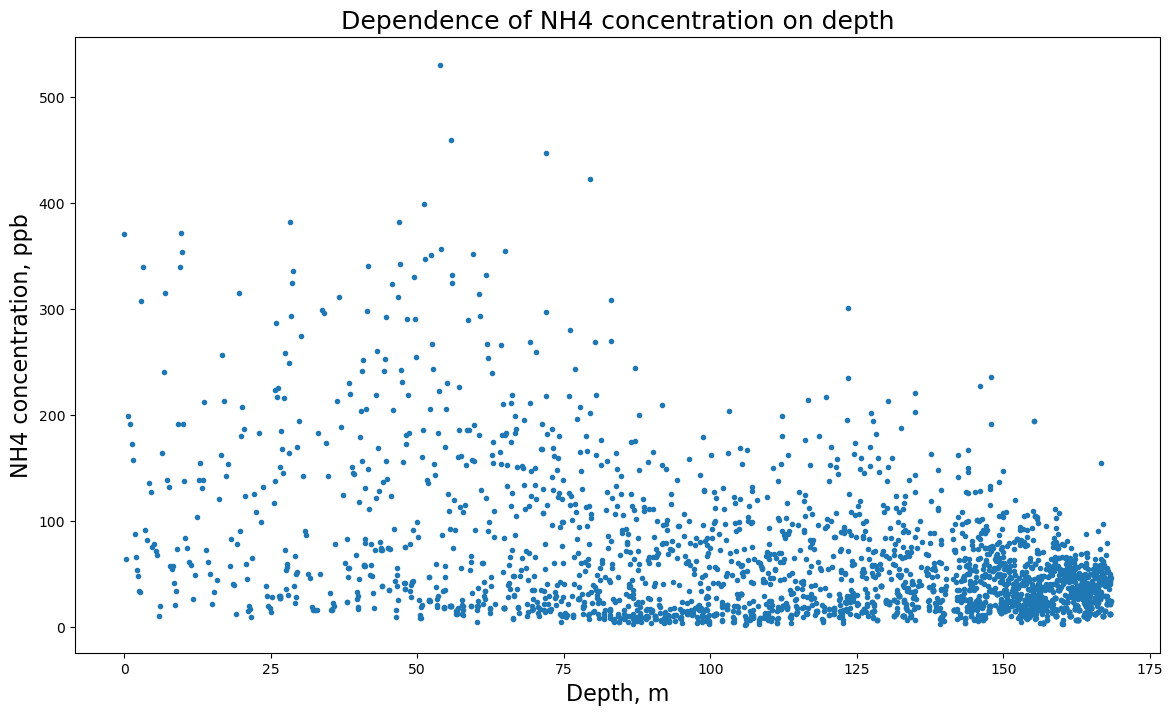

In [67]:
plt.figure(figsize=(14,8)) # Set the graph's size
plt.plot(df_Elbrus["Depth. m"], df_Elbrus["Nh4[ppb]"],'.') # Set the graph's plot

plt.xlabel("Depth, m", fontsize=16) # Set the fontsize of x-axis
plt.ylabel("NH4 concentration, ppb", fontsize=16) # Set the fontsize of y-axis
plt.title("Dependence of NH4 concentration on depth", fontsize=18) # Set the fontsize of the title

mwe = 3.03 * m;  
Сезонный сигнал легко читается до глубины около 170 метров.

In [61]:
# Read the data from the file
df_summer = pd.read_csv("Elbrus_annual_summer.txt", sep="\t")
df_summer

,Year,Nh4[ppb],No3[ppb],So4[ppb]
0,2009,207.721107,580.166682,723.913661
1,2008,180.920770,503.948766,730.801810
2,2007,174.581482,420.185156,493.577113
3,2006,264.445689,514.252545,559.764473
4,2005,146.390588,403.104027,527.255300
...,...,...,...,...
231,1778,49.346178,124.887491,115.195903
232,1777,56.705635,144.136530,149.725682
233,1776,40.908580,110.645700,126.353220
234,1775,41.042793,105.507388,110.612188


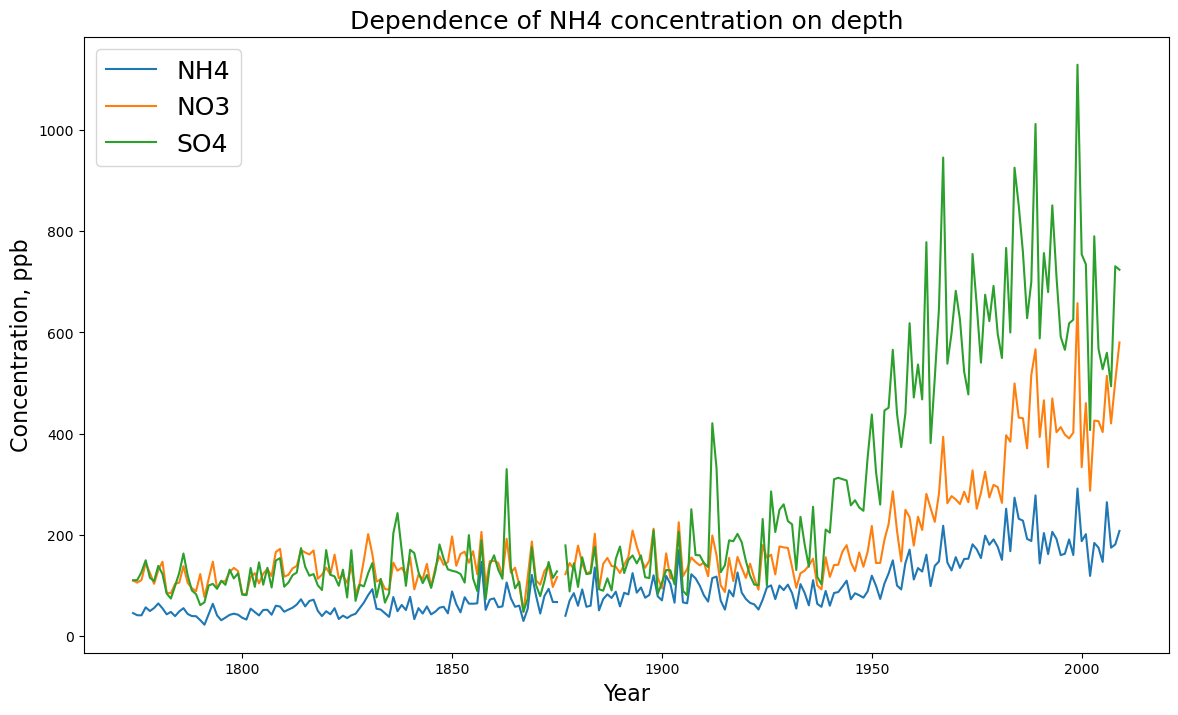

In [64]:
plt.figure(figsize=(14,8)) # Set the graph's size
plt.plot(df_summer["Year"], df_summer["Nh4[ppb]"]) # Set the graph's plot
plt.plot(df_summer["Year"], df_summer["No3[ppb]"]) # Set the graph's plot
plt.plot(df_summer["Year"], df_summer["So4[ppb]"]) # Set the graph's plot

plt.xlabel("Year", fontsize=16) # Set the fontsize of x-axis
plt.ylabel("Concentration, ppb", fontsize=16) # Set the fontsize of y-axis
plt.title("Dependence of NH4 concentration on depth", fontsize=18) # Set the fontsize of the title
plt.legend(['NH4', 'NO3', 'SO4'], fontsize=18) # Set the fontsize of the legend

По сравнению с индустриальным временем:
* NH4 вырос в 4.6 раз;
* NO3 вырос в 5.3 раз;
* SO4 вырос в 6.6 раз.

Активный рост концентрации соединений в атмосфере и воде начинается в 1940-х годах. Это связано с мировым нучно-техническим прогрессом, в связи с  Второй Мировой Войной, а также с усилением глобализации после её окончания.